In [2]:
import pandas as pd




In [3]:
from google.colab import files #North_2022_UNEDITED.xlsx
uploaded = files.upload()

Saving North_2022_EDITED.xlsx to North_2022_EDITED.xlsx


In [4]:

import io
df = pd.read_excel(io.BytesIO(uploaded['North_2022_EDITED.xlsx'])) # North_2022_UNEDITED.xlsx

In [ ]:
df.columns

Index(['YEAR', 'Growout', 'Sample ID', 'GIPSA Classification',
       'Test Weight (lb/bu)', 'Hectoliter Weight (kg/hl)',
       '1000 Kernel Weight (gm)', 'Kernel_Hardness', 'Kernel_Weight',
       'Wheat_Diameter', 'Wheat_moisture', 'Wheat_Protein', 'wheat_ash',
       'Flour Yield_1', 'Flour Yield_2', 'Flour_moisture', 'Flour_protein',
       'Flour-ash', 'Peak time (min)', 'Peak viscosity (RVU)',
       'Breakdown (RVU)', 'Final viscosity at 13 min (RVU)', 'L*', 'a*', 'b*',
       'PPO', 'Falling number ', 'Damaged Starch (%)', 'AACC76-31',
       'Mixo_Water_Abs', 'Mixo_Mix_Time', 'Mixo_Mix_Tolerance',
       'Fari_Flour Abs (14% mb)', 'Fari_Development_time',
       'Fari_Mix stability (min)', 'Fari_Mix Tolerance Index (FU)',
       'Fari_Breakdown time (min)', 'AL_Tenacity', 'AL_Extensibility',
       'AL_ Swelling index', 'AL_Strenght', 'AL_P/L', 'Al_Elasticity Index',
       'EX_Resist', 'EX_Extensibility', 'EX_Energy', 'EX_Resist max',
       'EX_Ratio', 'HMW-GS Composition',

**K-MEANS CLUSTERING**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
numerical_cols = ['TPP/TMP','crumb texture']
data = df[numerical_cols]

**Determining the number of clusters using the Elbow method**

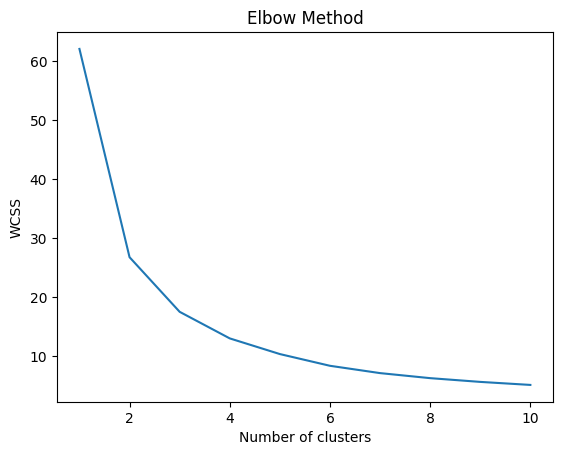

In [ ]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


**Determining the Bread_Volume range and Centroids**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


data = df[['TPP/TMP','crumb texture']]

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data)

# Add the cluster labels to the original DataFrame
df['cluster'] = pred_y

# Calculate the range of 'crumb_texture' in each cluster
bread_volume_range = df.groupby('cluster')['crumb texture'].agg(['min', 'max'])

print("Range of 'Bread_Volume' in Each Cluster:")
print(crumb_texture_range)

# Print cluster centroids
print("Cluster Centroids:")
print(kmeans.cluster_centers_)

# Print number of observations in each cluster
print("Number of Observations in Each Cluster:")
print(np.bincount(pred_y))

# Print various distance measures for each cluster
distances = cdist(data, kmeans.cluster_centers_, 'euclidean')
min_distances = np.min(distances, axis=1)
print("Within Cluster Sum of Squares:")
print(sum(min_distances**2))
print("Average Distance from Centroid:")
print(np.mean(min_distances))
print("Maximum Distance from Centroid:")
print(np.max(min_distances))


Range of 'Bread_Volume' in Each Cluster:
          min   max
cluster            
0        3.57  4.54
1        1.93  3.55
Cluster Centroids:
[[0.86071027 3.92053232]
 [0.81959375 3.2128125 ]]
Number of Observations in Each Cluster:
[263  96]
Within Cluster Sum of Squares:
26.77383121881655
Average Distance from Centroid:
0.23249294873556062
Maximum Distance from Centroid:
1.2904734887611262


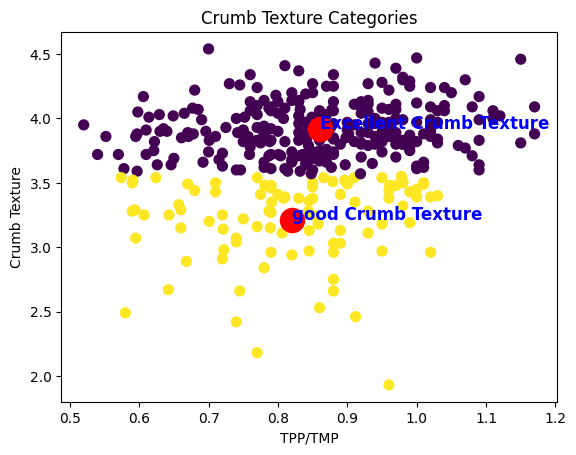

In [ ]:

# Define cluster labels
cluster_labels = {0: 'Excellent Crumb Texture', 1: 'good Crumb Texture'}
df['cluster_label'] = df['cluster'].map(cluster_labels)

# Plotting the clusters with labels
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=pred_y, s=50, cmap='viridis')
plt.xlabel("TPP/TMP")  # Add x-label
plt.ylabel("Crumb Texture")  # Add y-label
plt.title("Crumb Texture Categories")

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')

# Annotate the centroids with labels
for i, centroid in enumerate(kmeans.cluster_centers_):
    plt.annotate(cluster_labels[i], (centroid[0], centroid[1]), fontsize=12, fontweight='bold', c= 'blue')

plt.show()

In [5]:
# Categorize crumb texture into a binary classification

import pandas as pd
import io
# Create the new 'Volume_Category' column
bins = [-float('inf'), 3.56, float('inf')]
labels = [0, 1]
df['crumb_texture_classes'] = pd.cut(df['crumb texture'], bins=bins, labels=labels, include_lowest=True)

# Convert the labels to int64
df['crumb_texture_classes']= df['crumb_texture_classes'].astype(pd.Int64Dtype())

# Now 'df' contains the new 'Volume_Category' column with int64 data type
print(df[['crumb texture', 'crumb_texture_classes']])


     crumb texture  crumb_texture_classes
0             3.83                      1
1             4.09                      1
2             4.20                      1
3             3.93                      1
4             3.54                      0
..             ...                    ...
354           4.06                      1
355           3.91                      1
356           2.94                      0
357           3.62                      1
358           3.99                      1

[359 rows x 2 columns]


In [6]:
df['crumb_texture_classes'].unique()

<IntegerArray>
[1, 0]
Length: 2, dtype: Int64